# Project 1: SAT & ACT Analysis

In [2]:
#Imports:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
# Reading sat and act 2017 data
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: 
## The ACT and SAT data above belongs to the official results in 2017 for every state in the USA. 
### SAT exam consists of 3 different scores:
- Evidence-Based Reading and Writing 
- Math
- Total

### ACT exam consists of 5 different score:
- English
- Math
- Reading
- Science
- Composite

Both of the exams have a different evaluation system that uses different score parameters to calculate the success of the individuals.

Both of the data includes a participation column to point out the percentage of all the available individuals who participated in the specified exam type.

#### 4a. Does the data look complete? 

***Answer:*** 
It does look complete in terms of the values and scores in each individual state. But the SAT exam scores are missing the nation-wide score aggregation. Additionally, it is best to state that there are no null values.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

###### The range of possible values for SAT is:
- ***200-800*** for both Math and Evidence-Based Reading and Writing.
- Making Total range between ***400-1600***.

###### The range of possible values for ACT is:
- The scores can range between ***1-36*** for every section. 
- Composite is an average of all the scores that also ranges between **1-36**.

There are several issues with the scores:
- SAT Maryland Math scores
- ACT Maryland Science scores
- ACT Wyoming Composite scores

In [6]:
# The minimum for math test is an illegal value
# that should be looked in to
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [7]:
# The minimum for science scores is an illegal value 
# Also ACT scores have an extra column
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [8]:
# Since SAT Math score is NOT BETWEEN 200-800
# I can find it through mask filtering
sat_2017[(~sat_2017['Math'].between(200, 800))]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [9]:
# Since ACT Science score is between 1-36 but seems like it
# is off by 1 decimal point, it is better if we check the original data
act_2017['Science'].sort_values(ascending=True).head(3)

21     2.3
29    18.2
25    18.8
Name: Science, dtype: float64

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [10]:
sat_2017['Math'] = sat_2017['Math'].replace(52,524)

In [11]:
act_2017['Science'] = act_2017['Science'].replace(2.3, 23.2)

Fixed the errors found through the original data.

#### 5. What are your data types? 
Display the data types of each feature. 

In [12]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [13]:
# Composite data type seems odd, it should be of type float
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Yes, the participation column for both dataframes must be of data type float. Also the composite column in act_2017 is expected to be of data type float.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

***I based most of my code to functions so that I can come back and use the same function for every data set. It is convenient to create functions you can use throughout the overall code.***

In [14]:
# To convert the participation data from onject(string) to type float
def fix_data(data):
    data = (data.map(lambda data: data.replace('%','')).astype(float))/100
    return data

In [15]:
# To convert every column into type float to set a standard
def float_conversion(data, column):
    data[column] = data[column].astype(float)
    return print(f'{column} column converted to type float')

In [16]:
sat_2017['Participation'] = fix_data(sat_2017['Participation'])

In [17]:
act_2017['Participation'] = fix_data(act_2017['Participation'])

- Fix any individual values preventing other columns from being the appropriate type.

In [18]:
# Composite column expected to be float
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


In [19]:
act_2017['Composite'].tail()

47     23.8
48     21.9
49     20.4
50     20.5
51    20.2x
Name: Composite, dtype: object

In [20]:
act_2017['Composite'] = act_2017['Composite'].str.replace('x', '').astype(float)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [21]:
float_conversion(sat_2017, 'Evidence-Based Reading and Writing')

Evidence-Based Reading and Writing column converted to type float


In [22]:
float_conversion(sat_2017,'Math')

Math column converted to type float


In [23]:
float_conversion(sat_2017, 'Total')

Total column converted to type float


- Display the data types again to confirm they are correct.

In [24]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [25]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

In [26]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593.0,572.0,1165.0
1,Alaska,0.38,547.0,533.0,1080.0
2,Arizona,0.30,563.0,553.0,1116.0
3,Arkansas,0.03,614.0,594.0,1208.0
4,California,0.53,531.0,524.0,1055.0


In [27]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


***My data looks better, it is now easier to understand, interpret and analyze this data.***

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [28]:
sat_2017.rename(columns={'State' : 'state', 'Participation' : 'sat_17_participation', 'Evidence-Based Reading and Writing' : 'sat_17_ebraw', 'Math' : 'sat_17_math', 'Total' : 'sat_17_total'}, inplace=True)

In [29]:
act_2017.rename(columns={'State' : 'state', 'Participation' : 'act_17_participation', 'English' : 'act_17_english', 'Math' : 'act_17_math', 'Reading' : 'act_17_reading', 'Science' : 'act_17_science', 'Composite' : 'act_17_composite'},  inplace=True)

In [30]:
sat_2017.head(1)

,state,sat_17_participation,sat_17_ebraw,sat_17_math,sat_17_total
0,Alabama,0.05,593.0,572.0,1165.0


In [31]:
act_2017.head(1)

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,National,0.6,20.3,20.7,21.4,21.0,21.0


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|The State that the results belong to|
|sat_17_participation|float|SAT|Participation rate of eligible population for SAT '17|
|sat_17_ebraw|float|SAT|Reading and Writing results for SAT '17|
|sat_17_math|float|SAT|Math results for SAT '17|
|sat_17_total|float|SAT|Total score for SAT '17|
|act_17_participation|float|ACT|Participation rate of eligible population for ACT '17|
|act_17_english|float|ACT|English results for ACT '17|
|act_17_math|float|ACT|Math results for ACT '17|
|act_17_reading|float|ACT|Reading results for ACT '17|
|act_17_science|float|ACT|Science results for ACT '17|
|act_17_composite|float|ACT|Composite score for ACT '17|
|sat_18_participation|float|SAT|Participation rate of eligible population for ACT '18|
|sat_18_ebraw|float|SAT|Reading and Writing results for SAT '18|
|sat_18_math|float|SAT|Math results for SAT '18|
|sat_18_total|float|SAT|Total score for SAT '18|
|act_18_participation|float|ACT|Participation rate of eligible population for ACT '18|
|act_18_composite|float|ACT|Composite score for ACT '18|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [32]:
act_2017.head()

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [33]:
#code
act_2017.drop(index=0, axis=0,inplace=True)

In [34]:
act_2017.reset_index(drop='index',inplace=True)

In [35]:
act_2017.head()

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [36]:
#Code:
results_2017 = pd.merge(sat_2017, act_2017, on='state')

In [37]:
results_2017.head()

,state,sat_17_participation,sat_17_ebraw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,Alabama,0.05,593.0,572.0,1165.0,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547.0,533.0,1080.0,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563.0,553.0,1116.0,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614.0,594.0,1208.0,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531.0,524.0,1055.0,0.31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [38]:
#code
results_2017.to_csv('../data/combined_2017.csv', index=False)

In [39]:
results_2017.head()

,state,sat_17_participation,sat_17_ebraw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,Alabama,0.05,593.0,572.0,1165.0,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547.0,533.0,1080.0,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563.0,553.0,1116.0,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614.0,594.0,1208.0,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531.0,524.0,1055.0,0.31,22.5,22.7,23.1,22.2,22.8


## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [40]:
# Reading both act_2018 and sat_2018 csv files to dataframes
act_2018 = pd.read_csv('../data/act_2018.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')

Reading in 2018 data for both exams.

In [41]:
act_2018.tail()

,State,Participation,Composite
47,Virginia,24%,23.9
48,Washington,24%,22.2
49,West Virginia,65%,20.3
50,Wisconsin,100%,20.5
51,Wyoming,100%,20.0


In [42]:
sat_2018.tail()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
46,Virginia,68%,567,550,1117
47,Washington,69%,543,538,1081
48,West Virginia,28%,513,486,999
49,Wisconsin,3%,641,653,1294
50,Wyoming,3%,633,625,1257


#### Clearing out the '%' sign from both dataframes, and setting the participation column to an appropriate data type (integer)

In [43]:
sat_2018['Participation'] = fix_data(sat_2018['Participation'])

In [44]:
act_2018['Participation'] = fix_data(act_2018['Participation'])

In [45]:
float_conversion(sat_2018, 'Evidence-Based Reading and Writing')

Evidence-Based Reading and Writing column converted to type float


In [46]:
float_conversion(sat_2018, 'Math')

Math column converted to type float


In [47]:
float_conversion(sat_2018, 'Total')

Total column converted to type float


In [48]:
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

In [49]:
act_2018.dtypes # checking if all the changes are made without a problem

State             object
Participation    float64
Composite        float64
dtype: object

In [50]:
sat_2018.dtypes # checking if all the changes are made without a problem

State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

#### Renaming the columns to lower case and no spaces so that I can do further cleaning

In [51]:
# Column renaming code, lower case and no spaces.
# Every column has their year added to the name as well.
sat_2018.rename(columns={'State' : 'state', 'Participation' : 'sat_18_participation', 'Evidence-Based Reading and Writing' : 'sat_18_ebraw', 'Math' : 'sat_18_math', 'Total' : 'sat_18_total'}, inplace=True)

In [52]:
act_2018.rename(columns={'State' : 'state', 'Participation' : 'act_18_participation', 'English' : 'act_18_english', 'Math' : 'act_18_math', 'Reading' : 'act_18_reading', 'Science' : 'act_18_science', 'Composite' : 'act_18_composite'},  inplace=True)

##### Cleaning did really help me find out that there is an extra line in act_2018

In [53]:
# Discovered that the Maine row is duplicate, so I will drop one of the rows
act_2018['state'].value_counts().head()

Maine                   2
North Dakota            1
New Mexico              1
District of columbia    1
Arizona                 1
Name: state, dtype: int64

In [54]:
act_2018['state'][18:23]

18        Louisiana
19            Maine
20            Maine
21         Maryland
22    Massachusetts
Name: state, dtype: object

In [55]:
act_2018.drop(index = 20, axis = 1, inplace=True)

In [56]:
act_2018.reset_index(drop='index',inplace=True)

#### Data is now ready for merging

In [57]:
results_2018 = pd.merge(sat_2018, act_2018, on='state')

In [58]:
results_2018.to_csv('../data/combined_2018.csv', index=False)

#### Merging the two 2018 test results on 'state' column

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [59]:
final = pd.merge(results_2017, results_2018, on='state')

In [60]:
final.head()

,state,sat_17_participation,sat_17_ebraw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_ebraw,sat_18_math,sat_18_total,act_18_participation,act_18_composite
0,Alabama,0.05,593.0,572.0,1165.0,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595.0,571.0,1166.0,1.00,19.1
1,Alaska,0.38,547.0,533.0,1080.0,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562.0,544.0,1106.0,0.33,20.8
2,Arizona,0.30,563.0,553.0,1116.0,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577.0,572.0,1149.0,0.66,19.2
3,Arkansas,0.03,614.0,594.0,1208.0,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592.0,576.0,1169.0,1.00,19.4
4,California,0.53,531.0,524.0,1055.0,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540.0,536.0,1076.0,0.27,22.7


In [61]:
final.to_csv('../data/final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [62]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_17_participation,50.0,0.3860,0.345602,0.02,0.0400,0.34,0.650,1.0
sat_17_ebraw,50.0,570.8600,44.385146,503.00,535.2500,559.50,613.500,644.0
sat_17_math,50.0,558.6600,45.839832,492.00,524.0000,549.50,601.000,651.0
sat_17_total,50.0,1129.6200,89.913085,996.00,1057.0000,1107.50,1214.000,1295.0
act_17_participation,50.0,0.6592,0.321107,0.08,0.3100,0.71,1.000,1.0
act_17_english,50.0,20.8620,2.324307,16.30,19.0000,20.55,23.100,25.5
act_17_math,50.0,21.1360,1.973990,18.00,19.4000,20.90,23.000,25.3
act_17_reading,50.0,21.9560,2.046317,18.10,20.4250,21.70,23.875,26.0
act_17_science,50.0,21.4100,1.731962,18.20,19.9250,21.30,22.975,24.9
act_17_composite,50.0,21.4660,2.004241,17.80,19.8000,21.40,23.400,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [63]:
#code
def stdev(data, column):
    mean_col = (sum(data[column])/(len(data[column])))
    pre = 0
    for observation in data[column]:
        summer = (observation - mean_col) ** 2
        pre += summer
    std = round(math.sqrt(pre/(len(data[column])-1)),6)
    return std

In [64]:
stdev(final, 'act_18_composite')

2.111312

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [65]:
# Code here:

In [66]:
keys = []
values = []

In [67]:
for i in final.columns:
    if i == 'state':
        pass
    else:
        keys.append(i)
        values.append(stdev(final, i))
        sd = {k:v for (k,v) in zip(keys, values)}

In [68]:
sd

{'sat_17_participation': 0.345602,
 'sat_17_ebraw': 44.385146,
 'sat_17_math': 45.839832,
 'sat_17_total': 89.913085,
 'act_17_participation': 0.321107,
 'act_17_english': 2.324307,
 'act_17_math': 1.97399,
 'act_17_reading': 2.046317,
 'act_17_science': 1.731962,
 'act_17_composite': 2.004241,
 'sat_18_participation': 0.370976,
 'sat_18_ebraw': 47.010416,
 'sat_18_math': 46.987432,
 'sat_18_total': 92.845634,
 'act_18_participation': 0.341141,
 'act_18_composite': 2.111312}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [69]:
np.std(final)

sat_17_participation     0.342129
sat_17_ebraw            43.939053
sat_17_math             45.379119
sat_17_total            89.009413
act_17_participation     0.317879
act_17_english           2.300947
act_17_math              1.954150
act_17_reading           2.025750
act_17_science           1.714555
act_17_composite         1.984098
sat_18_participation     0.367248
sat_18_ebraw            46.537937
sat_18_math             46.515185
sat_18_total            91.912489
act_18_participation     0.337713
act_18_composite         2.090092
dtype: float64

#### Answer: My dictionary values match 100% with pandas describe method. But for an unknown reason, numpy's std method gives out different values than expected.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [70]:
#code
sat_2017_p_mask = sat_2017.drop(['sat_17_ebraw','sat_17_math'],axis = 1)

In [71]:
sat_2018_p_mask = sat_2018.drop(['sat_18_ebraw','sat_18_math'],axis = 1)

In [72]:
act_2017_p_mask = act_2017.drop(['act_17_english','act_17_math','act_17_reading','act_17_science'],axis = 1)

In [73]:
act_2018_p_mask = act_2018.sort_values(by = 'act_18_participation')

**Basic Masks:** The masks above are the simplest masks, to sort and observe some values in order to get the minimum maximum participation values. They could be used, but without looking at the bigger picture, we will be missing the details of where, how and why the changes occur. Therefore;

In [74]:
final_mask = final.drop(['sat_17_ebraw','sat_17_math','sat_17_total','sat_18_ebraw','sat_18_math','sat_18_total','act_17_english','act_17_math','act_17_reading','act_17_science','act_17_composite','act_18_composite'],axis = 1)

**Final Mask:** This mask above is to have an overall view of every data that belongs to every year with every exam. It is best to use this graph to sort participations so that we can spot the changes of participation rates over years and through states on both exams.

In [75]:
# Cameron gave the idea to create a column for change in participation in class, 
# I thought it was an amazing feedback. 
# Creating a participation change column would help make a meaning out of this data.  

final_change_addition = final

final_change_addition['sat_participation_change'] = (final_change_addition['sat_18_participation'] - final_change_addition['sat_17_participation'])
final_change_addition['act_participation_change'] = (final_change_addition['act_18_participation'] - final_change_addition['act_17_participation'])

In [76]:
# I added the change in total and composite scores for both exams into columns

final_change_addition['sat_total_change'] = 1 - (final_change_addition['sat_18_total'] / final_change_addition['sat_17_total'])
final_change_addition['act_composite_change'] = 1 - (final_change_addition['act_18_composite'] / final_change_addition['act_17_composite'])

In [77]:
# Set a mask to observe both exams individually in terms of change in participation rates
# and change in scores due to that participation rates

final_sat_change_mask = final_change_addition.drop(['sat_17_ebraw','sat_17_math','sat_17_total','sat_18_ebraw','sat_18_math','sat_18_total','act_17_english','act_17_math','act_17_reading','act_17_science','act_17_composite','act_18_composite','act_17_participation','act_18_participation','act_participation_change','act_composite_change'],axis = 1)
final_act_change_mask = final_change_addition.drop(['sat_17_ebraw','sat_17_math','sat_17_total','sat_18_ebraw','sat_18_math','sat_18_total','act_17_english','act_17_math','act_17_reading','act_17_science','act_17_composite','act_18_composite','sat_17_participation','sat_18_participation','sat_participation_change','sat_total_change'],axis = 1)

In [78]:
# For heat maps
final_change_mask = pd.merge(final_sat_change_mask, final_act_change_mask, on='state')

In [79]:
final_change_mask.loc[10:16]

,state,sat_17_participation,sat_18_participation,sat_participation_change,sat_total_change,act_17_participation,act_18_participation,act_participation_change,act_composite_change
10,Hawaii,0.55,0.56,0.01,0.069124,0.90,0.89,-0.01,0.005263
11,Idaho,0.93,1.00,0.07,0.003980,0.38,0.36,-0.02,0.000000
12,Illinois,0.09,0.99,0.90,0.086099,0.93,0.43,-0.50,-0.116822
13,Indiana,0.63,0.63,0.00,0.000000,0.35,0.32,-0.03,0.004425
14,Iowa,0.02,0.03,0.01,0.007843,0.67,0.68,0.01,0.004566
15,Kansas,0.04,0.04,0.00,-0.003968,0.73,0.71,-0.02,0.004608
16,Kentucky,0.04,0.04,0.00,-0.000802,1.00,1.00,0.00,-0.010000


**Polished Final Mask:** I know it sounds like a rare purple item you get from the final boss... because it is (thanks again Cameron). The change in participation rates in a new column will help me recognize through which states the change occurred positively/negatively.

### The masks are designed to be used to understand my data better. They are used further below to note the states with highs and lows in participation rates.

I haven't showed all my work in finding the highest and lowest values, because they take too much space and unnecessary graphs. But here are some of the findings:

In [80]:
final_mask.sort_values(by='sat_17_participation', ascending=True).head()

,state,sat_17_participation,act_17_participation,sat_18_participation,act_18_participation
33,North Dakota,0.02,0.98,0.02,0.98
23,Mississippi,0.02,1.00,0.03,1.00
14,Iowa,0.02,0.67,0.03,0.68
24,Missouri,0.03,1.00,0.04,1.00
43,Utah,0.03,1.00,0.04,1.00


### The States with lowest participation rate in 2017 for the SAT exam are:
- North Dakota
- Mississippi
- Iowa
- Utah
- Missouri

### The States with highest participation rate in 2017 for the SAT exam are:
- Michigan
- Connecticut
- Delaware
- New Hampshire
- Maine

### The States with lowest participation rate in 2018 for the SAT exam are:
- North Dakota
- Wyoming
- Nebraska
- Wisconsin
- South Dakota

### The States with highest participation rate in 2018 for the SAT exam are:
- Idaho
- Michigan
- Delaware
- Connecticut
- Colorado

In [81]:
final_mask.sort_values(by='act_18_participation',ascending=False).head()

,state,sat_17_participation,act_17_participation,sat_18_participation,act_18_participation
0,Alabama,0.05,1.0,0.06,1.0
16,Kentucky,0.04,1.0,0.04,1.0
48,Wisconsin,0.03,1.0,0.03,1.0
43,Utah,0.03,1.0,0.04,1.0
41,Tennessee,0.05,1.0,0.06,1.0


### The States with lowest participation rate in 2017 for the ACT exam are:
- Maine
- New Hampshire
- Delaware
- Rhode Island
- Pennsylvania

### The States with highest participation rate in 2017 for the ACT exam are:
- Alabama
- Kentucky
- Wisconsin
- Utah
- Tennessee

### The States with lowest participation rate in 2018 for the ACT exam are:
- Maine
- New Hampshire
- Delaware
- Rhode Island
- Pennsylvania

### The States with highest participation rate in 2018 for the ACT exam are:
- Alabama
- Kentucky
- Wisconsin
- Utah
- Tennessee

In [82]:
final_sat_change_mask[(final_sat_change_mask['sat_17_participation'] < 0.5) & (final_sat_change_mask['sat_18_participation'] < 0.9)].sort_values(by='sat_total_change', ascending=False).head()

,state,sat_17_participation,sat_18_participation,sat_participation_change,sat_total_change
43,Utah,0.03,0.04,0.01,0.184168
47,West Virginia,0.14,0.28,0.14,0.080110
34,Ohio,0.12,0.18,0.06,0.043516
30,New Mexico,0.11,0.16,0.05,0.039543
3,Arkansas,0.03,0.05,0.02,0.032285


***West Virginia*** had ***14% increase in their participation rates*** and ***8% total score increase***, which is pretty impressive improvement. This state should be looked in to and is noted for further analysis.

In [83]:
sat_2017_mean_mask = sat_2017.drop(['sat_17_ebraw','sat_17_math'],axis = 1).sort_values(by = 'sat_17_total')

In [84]:
sat_2018_mean_mask = sat_2018.drop(['sat_18_ebraw','sat_18_math'],axis = 1).sort_values(by = 'sat_18_total')

In [85]:
act_2017_mean_mask = act_2017.drop(['act_17_english','act_17_math','act_17_reading','act_17_science'],axis = 1).sort_values(by = 'act_17_composite')

In [86]:
act_2018_mean_mask = act_2018.sort_values(by = 'act_18_composite')

In [87]:
sat_2017_mean_mask.sort_values(by='sat_17_total',ascending=True).head()

,state,sat_17_participation,sat_17_total
8,District of Columbia,1.00,950.0
7,Delaware,1.00,996.0
12,Idaho,0.93,1005.0
22,Michigan,1.00,1005.0
19,Maine,0.95,1012.0


### The States with lowest mean total rate in 2017 for the SAT exam are:
- District of Columbia
- Delaware
- Idaho
- Michigan
- Maine

### The States with highest mean total rate in 2017 for the SAT exam are:
- Minnesota
- Wisconsin
- Iowa
- Missouri
- Kansas

### The States with lowest mean total rate in 2018 for the SAT exam are:
- District of Columbia
- Delaware
- Idaho
- West Virginia
- Utah

### The States with highest mean total rate in 2018 for the SAT exam are:
- Minnesota
- Wisconsin
- North Dakota
- Iowa
- Kansas

In [88]:
act_2017_mean_mask.sort_values(by='act_17_composite', ascending = True).head()

,state,act_17_participation,act_17_composite
28,Nevada,1.0,17.8
24,Mississippi,1.0,18.6
40,South Carolina,1.0,18.7
11,Hawaii,0.9,19.0
33,North Carolina,1.0,19.1


### The States with lowest mean composite rate in 2017 for the ACT exam are:
- Nevada
- Mississippi
- South Carolina
- Hawaii
- North Carolina

### The States with highest mean composite rate in 2017 for the ACT exam are:
- New Hampshire
- Massachusetts
- Connecticut
- Maine
- District of Columbia

### The States with lowest mean composite rate in 2018 for the ACT exam are:
- Nevada
- South Carolina
- Mississippi
- Hawaii
- Alabama

### The States with highest mean composite rate in 2018 for the ACT exam are:
- Connecticut
- Massachusetts
- New Hampshire
- New York
- Michigan

In [89]:
final_sat_change_mask[(final_sat_change_mask['sat_17_participation'] != 1) & (final_sat_change_mask['sat_18_participation'] == 1)]

,state,sat_17_participation,sat_18_participation,sat_participation_change,sat_total_change
5,Colorado,0.11,1.0,0.89,0.146545
11,Idaho,0.93,1.0,0.07,0.003980


In [90]:
final_sat_change_mask[(final_sat_change_mask['sat_17_participation'] == 1) & (final_sat_change_mask['sat_18_participation'] != 1)]

,state,sat_17_participation,sat_18_participation,sat_participation_change,sat_total_change


In [91]:
final_act_change_mask[(final_act_change_mask['act_17_participation'] != 1.0) & (final_act_change_mask['act_18_participation'] == 1.0)]

,state,act_17_participation,act_18_participation,act_participation_change,act_composite_change
26,Nebraska,0.84,1.0,0.16,0.060748
34,Ohio,0.75,1.0,0.25,0.077273


In [92]:
final_act_change_mask[(final_act_change_mask['act_17_participation'] == 1.0) & (final_act_change_mask['act_18_participation'] != 1.0)]

,state,act_17_participation,act_18_participation,act_participation_change,act_composite_change
5,Colorado,1.0,0.30,-0.70,-0.149038
22,Minnesota,1.0,0.99,-0.01,0.009302


In [93]:
final_change_mask.sort_values(by='sat_total_change',ascending=False).head(15)

,state,sat_17_participation,sat_18_participation,sat_participation_change,sat_total_change,act_17_participation,act_18_participation,act_participation_change,act_composite_change
43,Utah,0.03,0.04,0.01,0.184168,1.00,1.00,0.00,-0.004926
5,Colorado,0.11,1.00,0.89,0.146545,1.00,0.30,-0.70,-0.149038
12,Illinois,0.09,0.99,0.90,0.086099,0.93,0.43,-0.50,-0.116822
47,West Virginia,0.14,0.28,0.14,0.080110,0.69,0.65,-0.04,0.004902
10,Hawaii,0.55,0.56,0.01,0.069124,0.90,0.89,-0.01,0.005263
34,Ohio,0.12,0.18,0.06,0.043516,0.75,1.00,0.25,0.077273
38,Rhode Island,0.71,0.97,0.26,0.041431,0.21,0.15,-0.06,-0.008333
30,New Mexico,0.11,0.16,0.05,0.039543,0.66,0.67,0.01,0.015228
3,Arkansas,0.03,0.05,0.02,0.032285,1.00,1.00,0.00,0.000000
14,Iowa,0.02,0.03,0.01,0.007843,0.67,0.68,0.01,0.004566


***Ohio*** is also an interesting state where participation rates for both exams increased in a year, while they got a positive change in total scores as well. We could analyze further to see what this state did in order to get these results.

***Colorado*** has some statistics that stand out as well, due to the dramatic change in participation rates, it is not hard to guess that they went with a change in rules for exam participations. 

***Utah*** even though doesn't have a great increase or participation in SAT, they increased their total score by 18.4%. We should definitely look into this State, it might be interesting.

In [94]:
final[(final['act_17_participation'] >= 0.5) & (final['act_18_participation'] >= 0.5) & (final['sat_17_participation'] >= 0.5) & (final['sat_18_participation'] >= 0.5)]

,state,sat_17_participation,sat_17_ebraw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,...,sat_18_participation,sat_18_ebraw,sat_18_math,sat_18_total,act_18_participation,act_18_composite,sat_participation_change,act_participation_change,sat_total_change,act_composite_change
8,Florida,0.83,520.0,497.0,1017.0,0.73,19.0,19.4,21.0,19.4,...,0.56,550.0,549.0,1099.0,0.66,19.9,-0.27,-0.07,-0.080629,-0.005051
9,Georgia,0.61,535.0,515.0,1050.0,0.55,21.0,20.9,22.0,21.3,...,0.70,542.0,522.0,1064.0,0.53,21.4,0.09,-0.02,-0.013333,0.000000
10,Hawaii,0.55,544.0,541.0,1085.0,0.90,17.8,19.2,19.2,19.3,...,0.56,480.0,530.0,1010.0,0.89,18.9,0.01,-0.01,0.069124,0.005263
39,South Carolina,0.50,543.0,521.0,1064.0,1.00,17.5,18.6,19.1,18.9,...,0.55,547.0,523.0,1070.0,1.00,18.3,0.05,0.00,-0.005639,0.021390


***Among all the states, only the following four states have had over 50% participation rate for all of the exams that took place (SAT and ACT, 2017 and 2018):***
- Florida
- Georgia
- Hawaii
- South Carolina

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

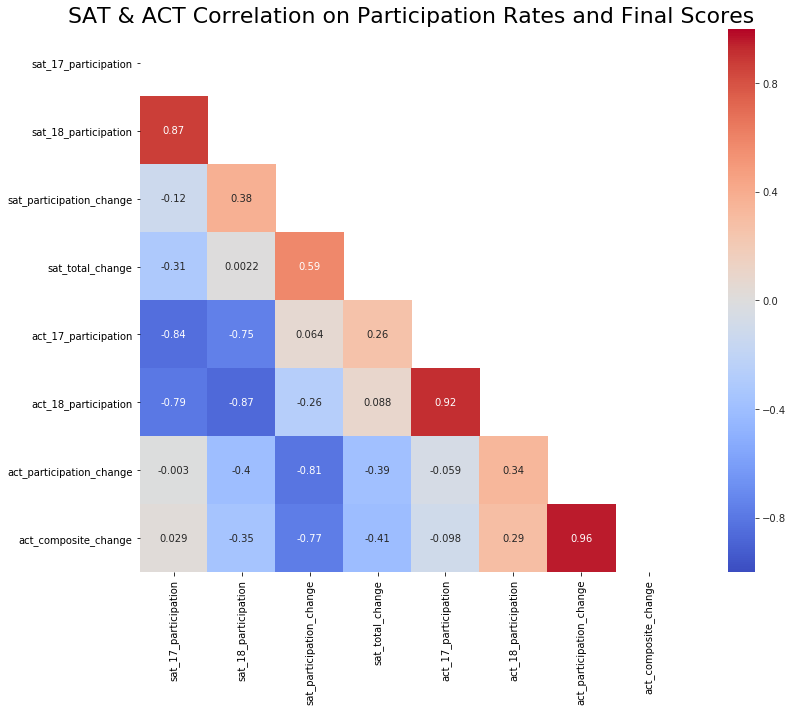

In [95]:
# I kept receiving: (Mask must have the same shape as data.) error
# and apparently this snippet fixes it (thanks to help of friends)
mask = np.zeros_like(final_change_mask.corr()) 
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 10))
with sns.axes_style("whitegrid"):
    sns.heatmap(final_change_mask.corr(), mask=mask,cmap='coolwarm', square=True, annot=True, vmax=1, vmin=-1)
    
plt.title('SAT & ACT Correlation on Participation Rates and Final Scores',fontsize = 22);

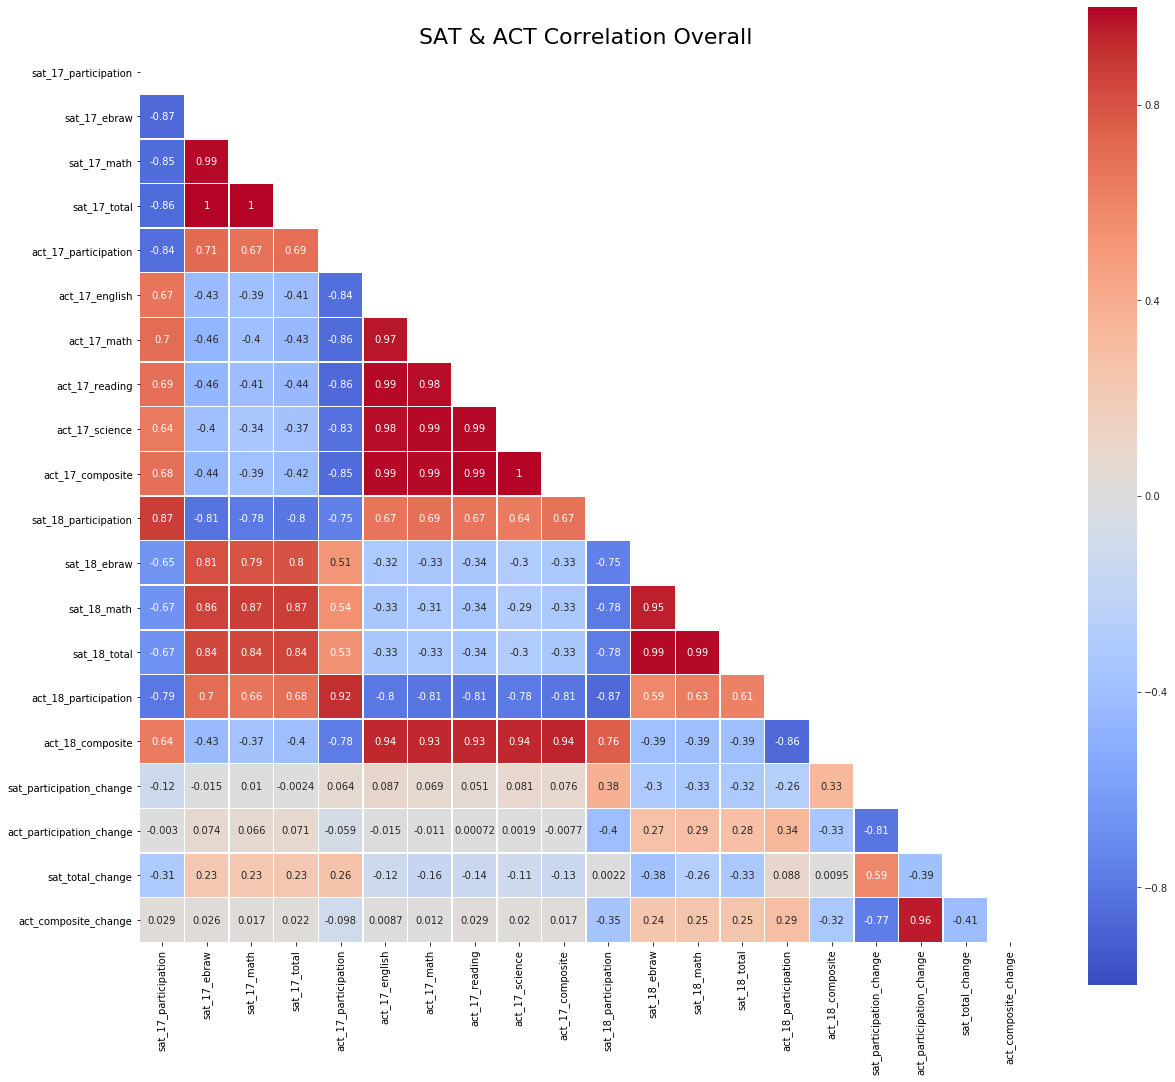

In [96]:
mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 18))

with sns.axes_style("whitegrid"):
    sns.heatmap(final.corr(), mask=mask,cmap='coolwarm', vmax=1, vmin=-1, linewidths=.5 ,square=True, annot=True)
    
plt.title('SAT & ACT Correlation Overall',fontsize = 22);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [97]:
participation_columns = final_mask.drop(['state'],axis=1)

In [98]:
participation_columns.columns

Index(['sat_17_participation', 'act_17_participation', 'sat_18_participation',
       'act_18_participation'],
      dtype='object')

In [115]:
def subplot_histograms(dataframe, list_of_columns):
    
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(16,8))
    plt.style.use('bmh')
    plt.tight_layout(pad=2.5)

    
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns): 
        if i % 2 == 0:
            color = 'brown'
            alpha = 0.6
        else:
            color = 'green'
            alpha = 0.6

        ax[i].hist(dataframe[column], color=color, alpha=alpha)
        ax[i].set_title(column, fontsize=22)
        ax[i].set_ylabel('Number of States', fontsize=14)
        ax[i].axvline(dataframe[column].mean(), color='red', linewidth=1)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

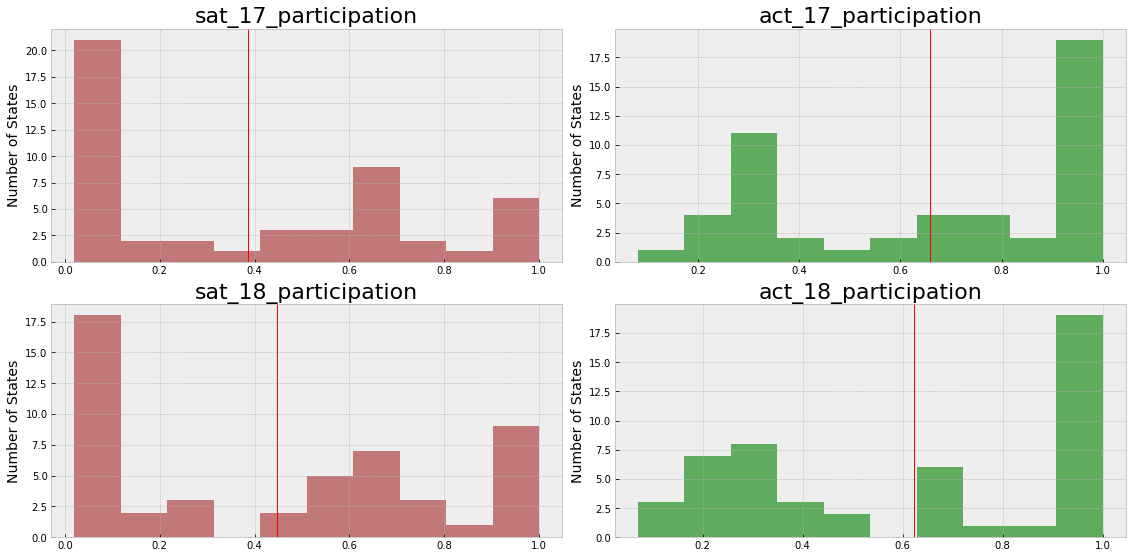

In [116]:
subplot_histograms(final,participation_columns.columns);

### We can see that ACT participation rate dropped while the SAT participation rate increased in 2018 when compared to the year before. But overall, if we looked at the mean of the distributions, ACT has a higher participation rate than SAT.

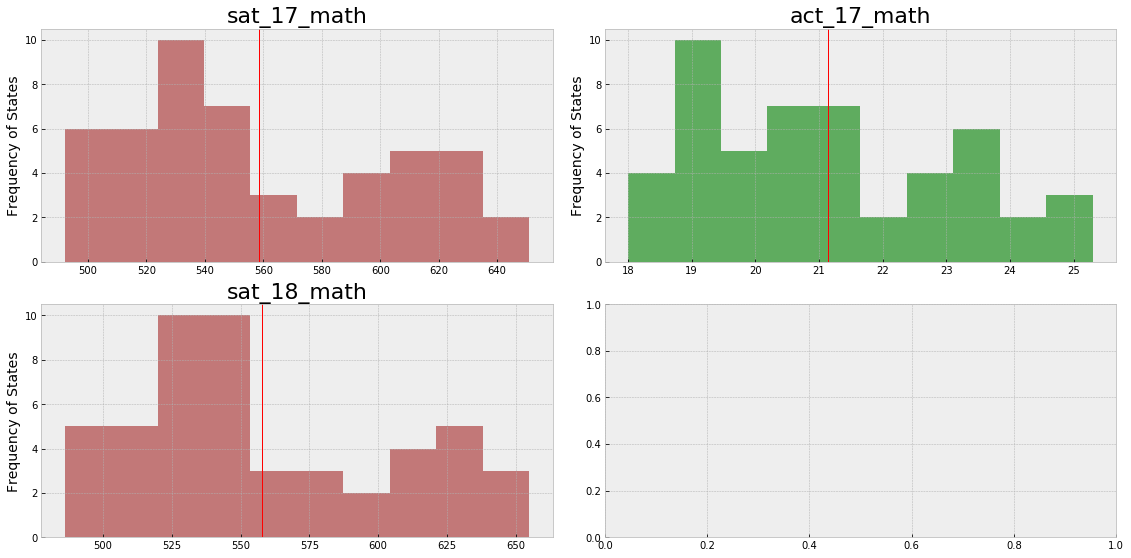

In [101]:
subplot_histograms(final,final[['sat_17_math','act_17_math','sat_18_math']].columns);

### While there is minimal improvement in the average math results in SAT over the year, it is not possible to state any difference in ACT scores due to unavailability of data.

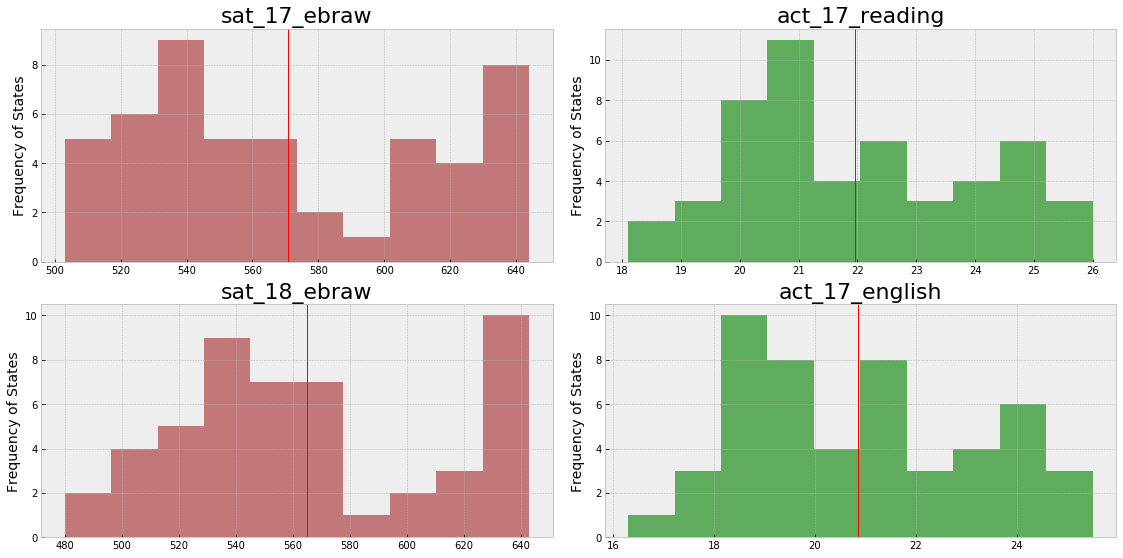

In [102]:
subplot_histograms(final,final[['sat_17_ebraw','act_17_reading','sat_18_ebraw','act_17_english']].columns);

### It is observed that the average EBRW score has droppped in a year for the SAT, it is not possible to make the same observation in ACT results. The second subplot is used to observe the English scores of the participants, and not related to 2018 results anyhow.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [103]:
def scatter_plot (dataframe, col1, col2, colors):
    
    corr_coef = np.corrcoef(x=dataframe[col1],y=dataframe[col2])[0,1]
    plt.figure(figsize=(6,6))
    p = sns.regplot(col1,col2,data=dataframe,color=colors,marker = 'o')
    
    plt.title(f'''Correlation of 
    "{col1}" & "{col2}" 
    for each state.
 Correlation coefficient = {round(corr_coef,3)}''')
    plt.xlabel(xlabel=col1) 
    plt.ylabel(ylabel=col2)

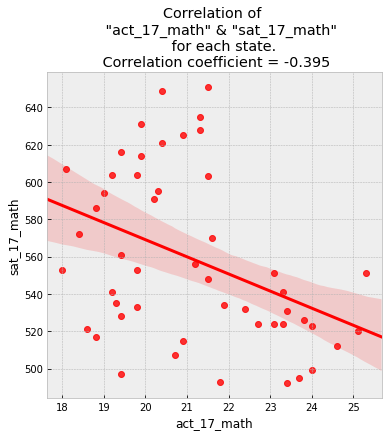

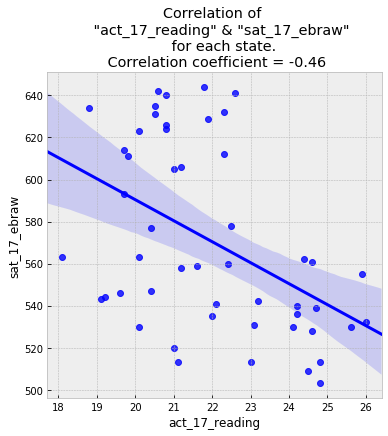

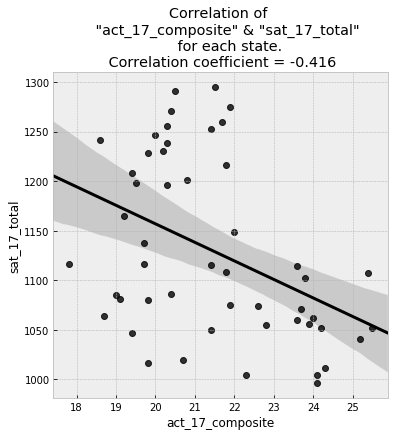

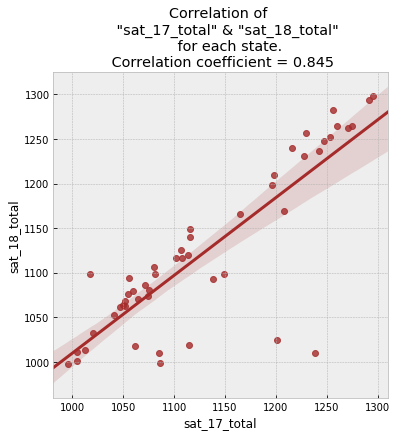

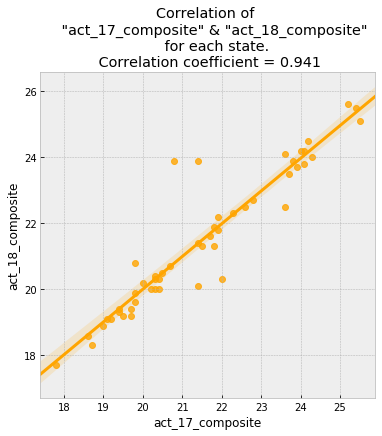

In [104]:
# Here are the required scatter plots, I believe there are more to it
# in these scatterplots, therefore I will experiment with them in
# the code blocks after
scatter_plot(final,'act_17_math','sat_17_math','red')
scatter_plot(final,'act_17_reading','sat_17_ebraw','blue')
scatter_plot(final,'act_17_composite','sat_17_total','black')
scatter_plot(final,'sat_17_total','sat_18_total','brown')
scatter_plot(final,'act_17_composite','act_18_composite','orange')

Most of these scatterplots are to understand data better as well as practicing visualization of the data. But to understand and implement results on these data, we have to choose our 3 States and decide on what kind of data would make a difference to what we are trying to solve.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [105]:
def boxplotter(data,datacol,color, axis):
    sns.boxplot(data[datacol], orient='v', color=color, ax=axes[axis], linewidth = 1.8)
    
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

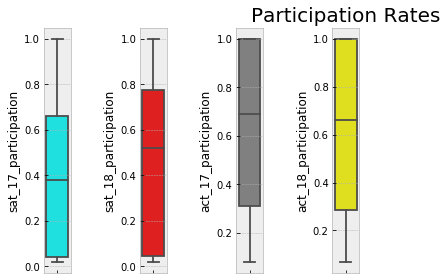

In [106]:
f, axes = plt.subplots(1,4)
boxplotter(sat_2017,'sat_17_participation','cyan',0)
boxplotter(sat_2018,'sat_18_participation','red',1)
boxplotter(act_2017,'act_17_participation','grey',2)
boxplotter(act_2018,'act_18_participation','yellow',3)
plt.title('Participation Rates', fontsize = 20)
plt.tight_layout()

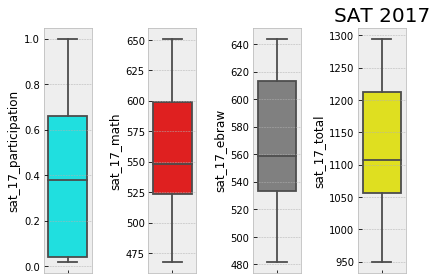

In [107]:
f, axes = plt.subplots(1,4)
boxplotter(sat_2017,'sat_17_participation','cyan',0)
boxplotter(sat_2017,'sat_17_math','red',1)
boxplotter(sat_2017,'sat_17_ebraw','grey',2)
boxplotter(sat_2017,'sat_17_total','yellow',3)
plt.title('SAT 2017', fontsize = 20)
plt.tight_layout()

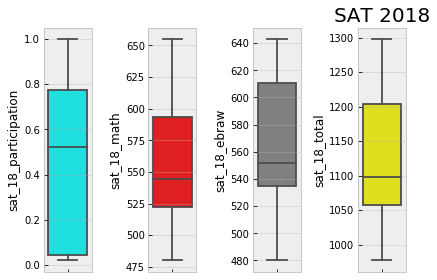

In [108]:
f, axes = plt.subplots(1,4)
boxplotter(sat_2018,'sat_18_participation','cyan',0)
boxplotter(sat_2018,'sat_18_math','red',1)
boxplotter(sat_2018,'sat_18_ebraw','grey',2)
boxplotter(sat_2018,'sat_18_total','yellow',3)
plt.title('SAT 2018', fontsize = 20)
plt.tight_layout()

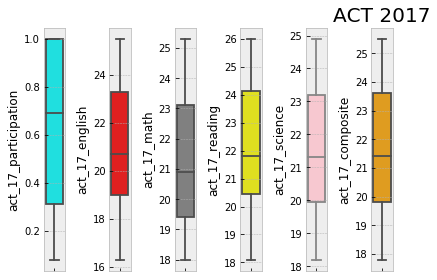

In [109]:
f, axes = plt.subplots(1,6)
boxplotter(act_2017,'act_17_participation','cyan',0)
boxplotter(act_2017,'act_17_english','red',1)
boxplotter(act_2017,'act_17_math','grey',2)
boxplotter(act_2017,'act_17_reading','yellow',3)
boxplotter(act_2017,'act_17_science','pink',4)
boxplotter(act_2017,'act_17_composite','orange',5)
plt.title('ACT 2017', fontsize = 20)
plt.tight_layout()

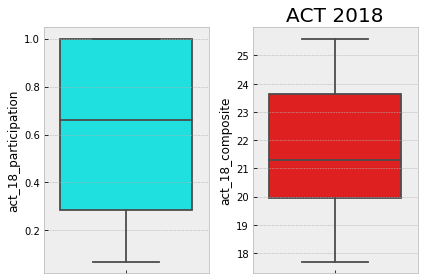

In [110]:
f, axes = plt.subplots(1,2)
boxplotter(act_2018,'act_18_participation','cyan',0)
boxplotter(act_2018,'act_18_composite','red',1)
plt.title('ACT 2018', fontsize = 20)
plt.tight_layout()

***Box plots*** are an easy way to see the mean of every column as well as interquartile ranges and outliers. For some reason I was not able to see the outliers? (I have tried showfliers & fliersize)

***For SAT exam*** over the year, we can see that as the participation rate rose, the total success mean dropped.

***ACT exam*** on the other hand, participation rates were stable, therefore the composite mean did not change as well.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

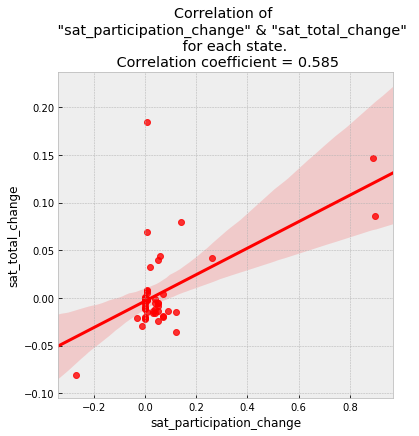

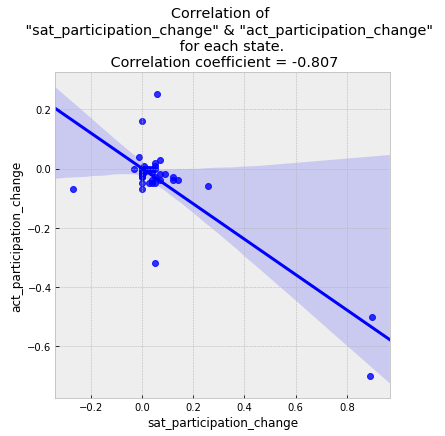

In [111]:
scatter_plot(final,'sat_participation_change','sat_total_change','red')
scatter_plot(final,'sat_participation_change','act_participation_change','blue')

I still wanted to see how related the participation changes were.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [112]:
final_change_mask.loc[34]

state                            Ohio
sat_17_participation             0.12
sat_18_participation             0.18
sat_participation_change         0.06
sat_total_change            0.0435161
act_17_participation             0.75
act_18_participation                1
act_participation_change         0.25
act_composite_change        0.0772727
Name: 34, dtype: object

***Ohio:*** Ohio state requires their students to take at least one of the 2 exams. The students can take one of the two tests and their success is highly dependable on how well they do on these tests.

Due to news that was published in 2017, people had many concerns about whether their kids are taking too many tests, or whether the state is going to push the high schools and put them into order after collecting the data from the test results. 

One of the school principals (Tyler Alexander) claimed that their students have benefitted the SAT exam to get ready for college:

“A few years ago we did an SAT pilot, and we had a lot of students deemed college-ready by Sinclair based on their SAT score who had not been deemed ready on the Accuplacer test. It benefited some of our students.”

Ohio seems like a prospect state with increased participation and success rates for both exams, it is definitely a state that the college board should invest on to attract more students to SAT than ACT.

https://www.daytondailynews.com/news/too-much-testing-some-schools-angry-with-ohio-act-sat-mandate/5lPdirdJ68IuXs1ez7Mv7L/

https://www.cleveland.com/metro/2017/04/free_sat_or_act_exams_give_all.html

https://www.usatoday.com/story/news/nation/2019/04/23/17-students-ohio-high-school-perfect-act-score/3552583002/

http://education.ohio.gov/Topics/Testing/ACT-SAT-FAQs#FAQ2839

https://reports.collegeboard.org/pdf/2017-ohio-sat-suite-assessments-annual-report.pdf

In [113]:
final_change_mask.loc[47]

state                       West Virginia
sat_17_participation                 0.14
sat_18_participation                 0.28
sat_participation_change             0.14
sat_total_change                0.0801105
act_17_participation                 0.69
act_18_participation                 0.65
act_participation_change            -0.04
act_composite_change           0.00490196
Name: 47, dtype: object

***West Virginia:*** West Virginia Department of Education has already took a step with making SAT a standardized test statewide. Although it states that ACT is more popular among students, and was backed by several education leaders and the governor. 

Khan Academy sources will be used to supply the needs of the students. A lot of financial support is utilized by the college board to make students as exposed to the SAT benefits as possible. 

The news were published in September 13, 2017. So it is quite surprising how still West Virginia has only 28% participation rate for SAT in 2018. 

The College Board must get a hands-on approach for this particular state, because even though there is a change being made, it is still taking some time to get the results.

https://www.wvgazettemail.com/news/education/wv-chooses-sat-as-new-high-school-standardized-test-for/article_b60d2618-4943-56f6-b180-4b4442172ef8.html

https://reports.collegeboard.org/pdf/2017-west-virginia-sat-suite-assessments-annual-report.pdf

In [114]:
final_change_mask.loc[43]

state                             Utah
sat_17_participation              0.03
sat_18_participation              0.04
sat_participation_change          0.01
sat_total_change              0.184168
act_17_participation                 1
act_18_participation                 1
act_participation_change             0
act_composite_change       -0.00492611
Name: 43, dtype: object

***Utah:*** There have been major issues with testing in Utah. There are news related to students who lost their scores due to technical problems and the partnered company not giving enough effort to make the system work as it should. 

***QUOTE*** "In February 2018, the state signed a contract with a new company — Questar Assessment Inc. — to conduct its year-end tests. Despite concerns reported in other states, Utah Board of Education members approved a 10-year, $44 million deal as part of an effort to rebrand the annual exam, give it a new name, RISE, and encourage more students to take it.

On Nov. 27, Questar had issues developing the student rosters. On Jan. 9 of this year, it reported problems with putting IDs on files. On March 19, it failed to go live with spring testing as scheduled.

By the end of April, Utah had experienced five major testing interruptions. The outages here delayed more than 18,000 public school students in completing their assessments in April and May. For one day, no one was able to take a science exam. On at least four others, testing was stopped entirely for some school districts. The window to complete the assessments had to be expanded into June."

Apparently, similar to Questar, their parent company ETS have failed to impress in California and Texas as well:
 
- With AP and SAT exams ETS offered through the College Board, it had "minor to moderate failures"

Therefore College Board can certainly further assess these technical difficulties and come into conclusion to find a better way to conduct these tests.

https://www.sltrib.com/news/education/2019/09/18/standardized-tests-utah/

https://reports.collegeboard.org/pdf/2017-utah-sat-suite-assessments-annual-report.pdf

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Population-wise it appears to be the best choice for the College Board to implement some improvements in Ohio State. Because, even though we are talking about percentages of participation rates, when it comes to population, students eligible for the test in Ohio are tenfold compared to West Virginia and Utah. 

Besides there seems to be a lot of positive feedback coming from high schools, about students benefitting from SAT exam. Also the success rate increased quite dramatically, which would be an encouragement for the parents to guide their children on finding the right path.

Utah have received a lot of negative feedback on the system provider they chose and how they spent $44Mil even though they knew the company have experienced a lot of problems in other states.

West Virginia has already partnered up with the College Board to start their students taking the SAT, besides the number of eligible test takers are far lower than Ohio.

To increase the number of people taking tests can rely on several different criteria:
- Reliability
- Difficulty
- Success stories
- Chance of retaking
- Number of Resources
- Self-paid or financed by the state
- Researching parents impressions on the tests

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code: